In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os

In [70]:
pd.set_option('display.max_columns', 500)

In [5]:
os.getcwd()

'C:\\Users\\cohen\\OneDrive\\Documentos\\Israel_2021\\ITC\\hackaton\\csvs'

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'arnona.csv',
 'demographics.csv',
 'EDA.ipynb',
 'electricity.csv',
 'water.csv']

In [12]:
arnona = pd.read_csv('arnona.csv')
arnona = arnona.drop(columns=['Unnamed: 0'])
print(arnona.head())
print('Shape of arnona:', arnona.shape)

              name      id        price
0  Carolyn Maxwell  275577   925.818053
1      Karen Lewis  381455   646.788421
2    Michael Ochoa  376324   521.599738
3      Anthony Orr  454422  1066.838787
4  Angela Humphrey  354169   682.137018
Shape of arnona: (1000, 3)


In [15]:
arnona['id'].nunique()

1000

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

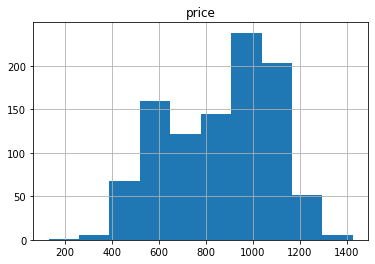

In [16]:
arnona.hist(column='price')

In [17]:
electricity = pd.read_csv('electricity.csv')
electricity = electricity.drop(columns=['Unnamed: 0'])
print(electricity.head())
print('Shape of electricity:', electricity.shape)

              name      id     January    February       March       April  \
0  Carolyn Maxwell  275577  159.836085  142.613838   86.135874  118.377261   
1      Karen Lewis  381455  283.184533  259.160898  200.194615  239.098017   
2    Michael Ochoa  376324  148.455611  138.406645   87.938437  115.246668   
3      Anthony Orr  454422  281.527149  270.264577  199.684379  213.167251   
4  Angela Humphrey  354169  235.113497  232.025577  171.087153  187.543315   

          May        June        July      August   September     October  \
0  121.039251  122.093610  139.041100   99.942512  122.961977  109.987276   
1  241.357899  241.551142  251.312567  224.660234  247.252417  227.850016   
2  115.794555  116.441583  130.077618   98.668334  117.300889  111.370193   
3  236.985223  239.281382  246.275428  202.720614  241.991039  206.815925   
4  191.876388  194.774049  207.267990  174.309363  200.109117  176.598516   

    Novemeber    December  
0  115.741133  142.132228  
1  238.12347

In [20]:
months = electricity.columns[2:].values

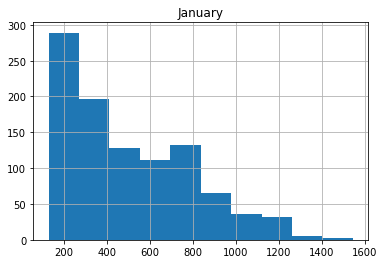

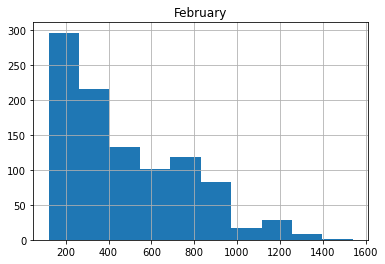

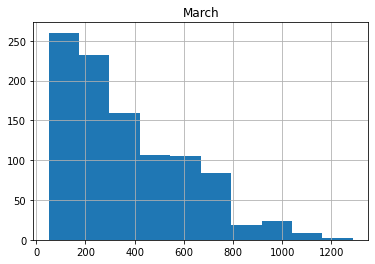

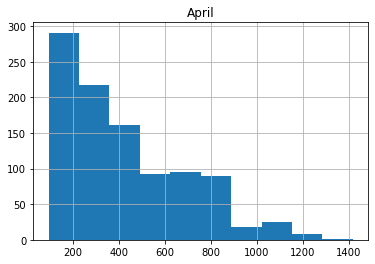

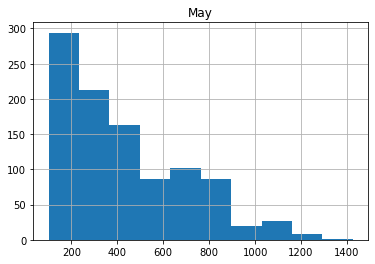

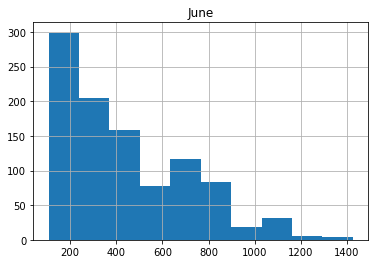

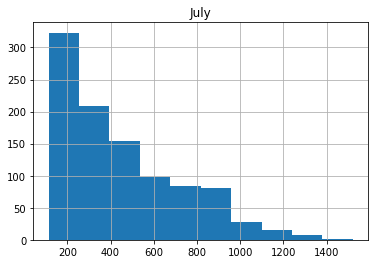

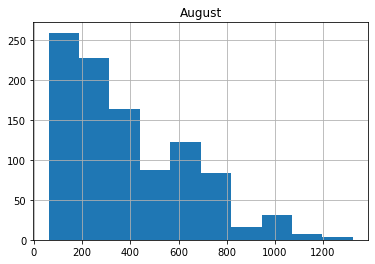

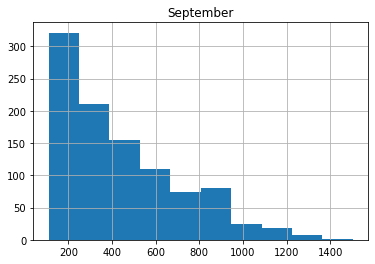

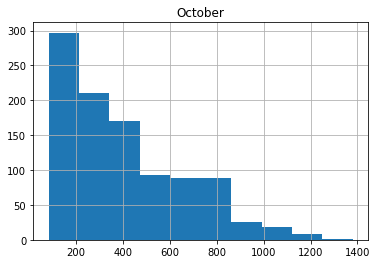

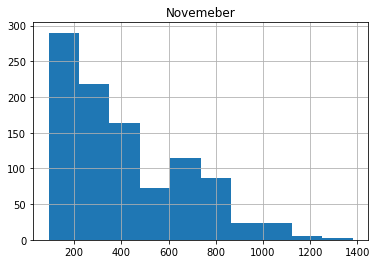

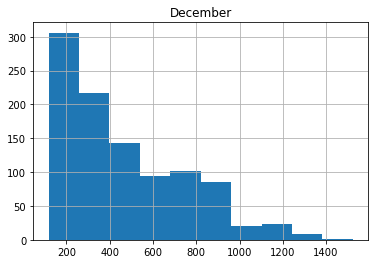

In [21]:
for month in months:
    electricity.hist(column=month)

In [22]:
electricity.describe()

,id,January,February,March,April,May,June,July,August,September,October,Novemeber,December
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,343682.043000,495.822506,475.370398,364.563850,417.707195,425.871303,434.011093,451.548226,384.659044,442.575602,398.033588,408.358853,462.075920
std,76103.572369,296.981422,288.874442,246.249024,265.928172,269.119014,271.959966,278.734450,252.900390,275.873351,258.036301,262.251177,283.124431
min,210356.000000,130.031873,119.989190,49.889398,93.175116,100.342553,105.922841,112.893300,60.247321,109.160832,83.537105,90.738364,117.169413
25%,275569.500000,253.399235,239.291178,170.182449,201.709938,207.287170,211.459438,226.498838,181.813579,217.515728,189.379228,196.565035,232.313258
50%,346929.000000,418.947930,400.458142,308.386783,350.696056,359.938075,366.918571,379.415885,326.336279,374.620525,335.617792,345.285743,387.682303
75%,412824.500000,716.125279,690.746411,539.679110,618.178683,627.361576,637.857699,662.243552,573.662594,649.340395,594.295781,608.543407,675.175817
max,469793.000000,1543.556221,1541.099054,1287.731870,1417.317771,1425.806250,1426.499403,1521.405097,1324.085052,1502.670674,1380.607742,1381.286559,1523.880167


Average price of Electricity per month:

In [43]:
months_elect = pd.DataFrame(columns=['month', 'mean'])
for month in months:
    elect_mean = electricity[month].mean()
    row = [month, elect_mean]
    months_elect.loc[len(months_elect)] = row

<AxesSubplot:xlabel='month', ylabel='mean'>

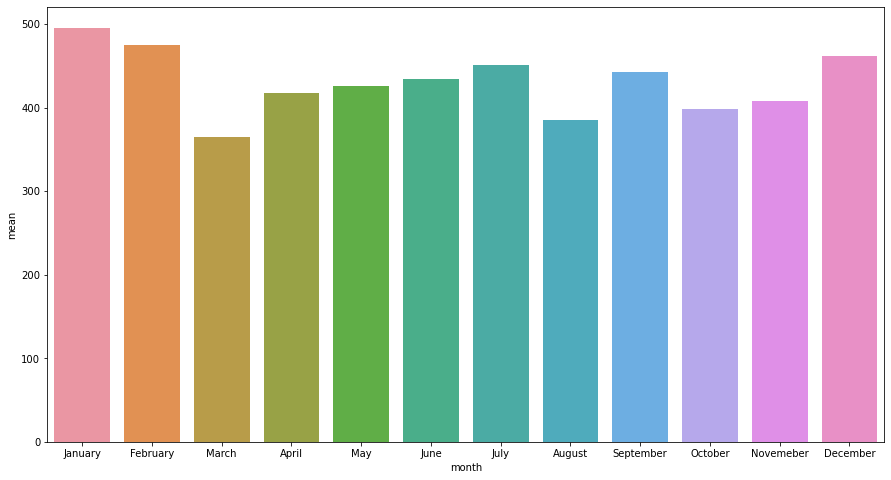

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(data=months_elect, x='month', y='mean')

In [61]:
elec_melt = pd.melt(electricity, 
                    id_vars=['name', 'id'], 
                    value_vars=months, 
                    value_name='price', 
                    var_name='month')

<AxesSubplot:xlabel='month', ylabel='price'>

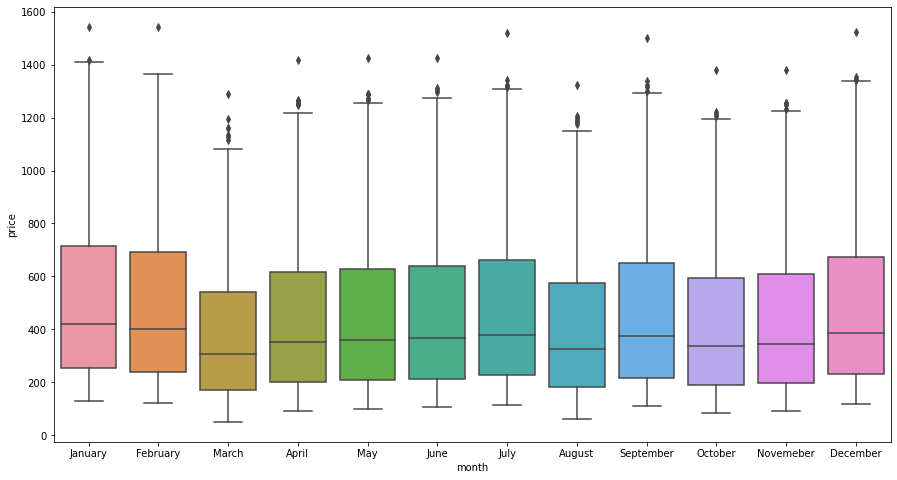

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(data=elec_melt, x="month", y="price")

In [23]:
water = pd.read_csv('water.csv')
water = water.drop(columns=['Unnamed: 0'])
print(water.head())
print('Shape of water:', water.shape)

              name      id     January   February       March       April  \
0  Carolyn Maxwell  275577   29.949542  29.407899   68.598871   38.122866   
1      Karen Lewis  381455   77.289945  59.500058   64.792058   80.935199   
2    Michael Ochoa  376324   32.511556  79.367638   71.763645   93.219920   
3      Anthony Orr  454422  117.574795  59.813435  111.758970   63.503815   
4  Angela Humphrey  354169   55.434655  55.749835   50.567353  112.167661   

         May        June       July      August   September     October  \
0  82.455467   56.160632  77.139078   57.063990   51.644350   78.358674   
1  51.217866  126.742549  80.780546   74.295264  100.749690  110.326977   
2  68.044189   58.015769  78.663846   37.476421   89.030289   62.875537   
3  76.355345   48.353775  55.183664   66.925268   70.203328   76.483371   
4  53.542866   67.878515  75.196150  104.748537   70.382449   65.091528   

    Novemeber   December  
0   62.868517  71.419495  
1   81.672367  74.987519  
2   4

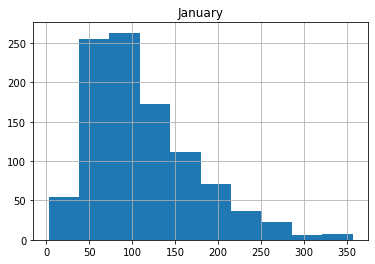

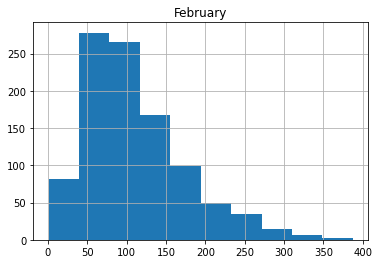

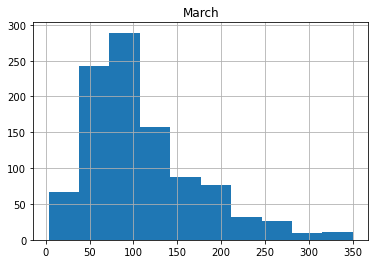

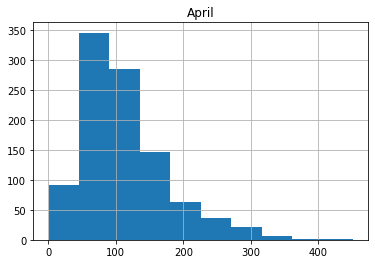

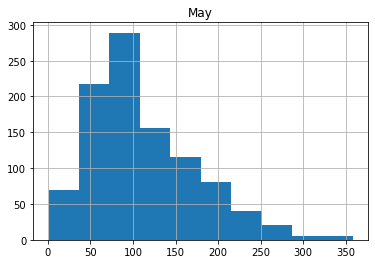

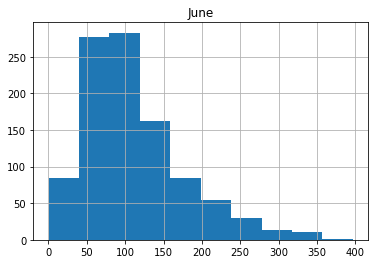

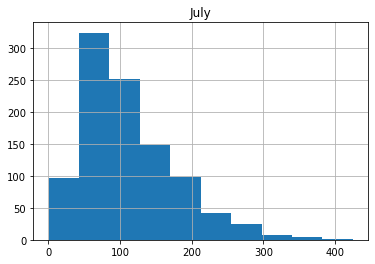

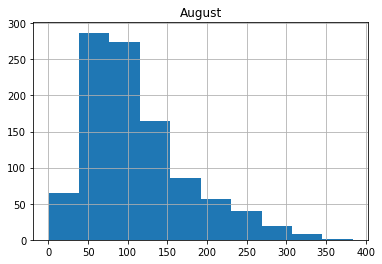

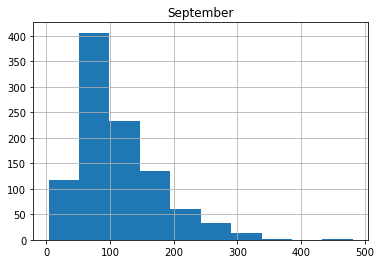

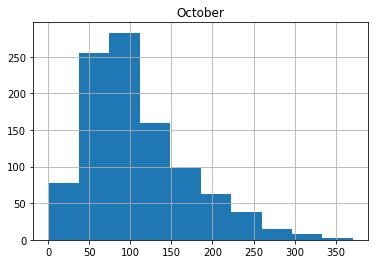

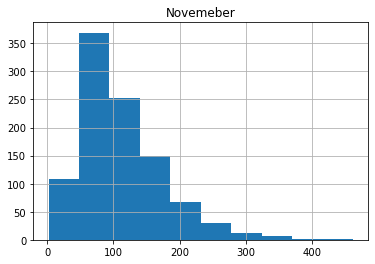

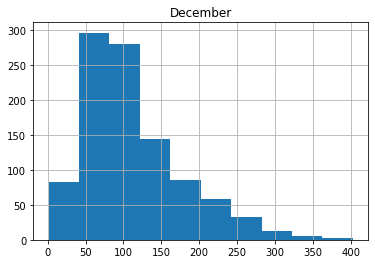

In [24]:
for month in months:
    water.hist(column=month)

In [25]:
water.describe()

,id,January,February,March,April,May,June,July,August,September,October,Novemeber,December
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,343682.043000,112.155009,110.532820,110.181468,112.144676,111.827743,111.074286,111.264912,110.706916,112.814259,108.929266,111.421736,112.889802
std,76103.572369,61.812910,63.455871,64.024066,64.668923,62.423264,64.106347,64.540209,63.931383,63.415244,62.364261,63.571023,65.320263
min,210356.000000,2.635925,0.664471,3.228095,0.427445,0.848579,0.212941,0.339151,0.065343,3.640732,0.540529,2.006770,1.094447
25%,275569.500000,67.252073,67.086210,66.183906,68.136680,67.975226,65.824235,65.879255,65.714739,66.914275,65.233265,67.429510,67.505348
50%,346929.000000,98.377656,94.932704,93.041873,97.395354,96.776980,98.310498,96.062982,95.914499,96.520248,93.917932,97.966341,95.921734
75%,412824.500000,146.306107,144.418950,140.803797,142.708347,146.789521,140.418036,148.243507,141.945373,145.319500,140.388665,145.101302,143.600860
max,469793.000000,357.315387,387.571155,350.195751,450.971133,358.415676,396.703047,424.854352,383.706138,481.281138,370.887335,462.065100,402.795324


In [26]:
demographics = pd.read_csv('demographics.csv')
demographics = demographics.drop(columns=['Unnamed: 0'])
print(demographics.head())
print('Shape of demographics:', demographics.shape)

              name  birth_date  age  children  employment      id  \
0  Carolyn Maxwell  1977-05-08   45         3           1  275577   
1      Karen Lewis  1964-07-03   58         2           1  381455   
2    Michael Ochoa  1992-07-30   30         1           1  376324   
3      Anthony Orr  1977-10-03   45         2           1  454422   
4  Angela Humphrey  1961-02-25   61         1           1  354169   

              city  
0  Rishon_LeTsiyon  
1        Ramat_Gan  
2   Ramat_HaSharon  
3   Tel_Aviv_Yaffo  
4        Ramat_Gan  
Shape of demographics: (1000, 7)


<AxesSubplot:xlabel='age', ylabel='count'>

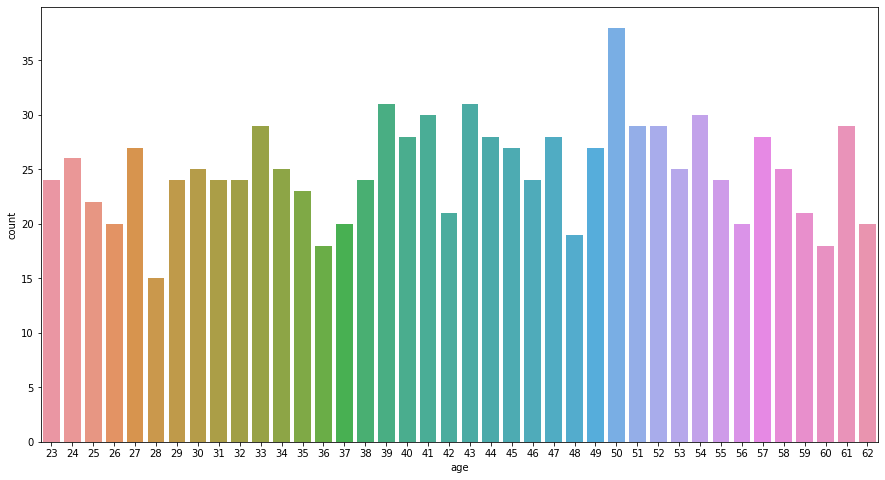

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(data=demographics,
             x='age')

No outliers on age

<AxesSubplot:xlabel='age'>

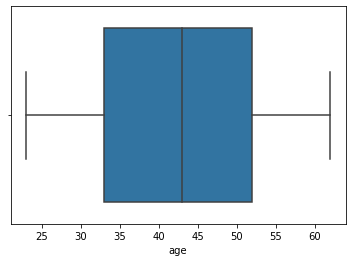

In [66]:
sns.boxplot(data=demographics, x='age')

<AxesSubplot:xlabel='children', ylabel='count'>

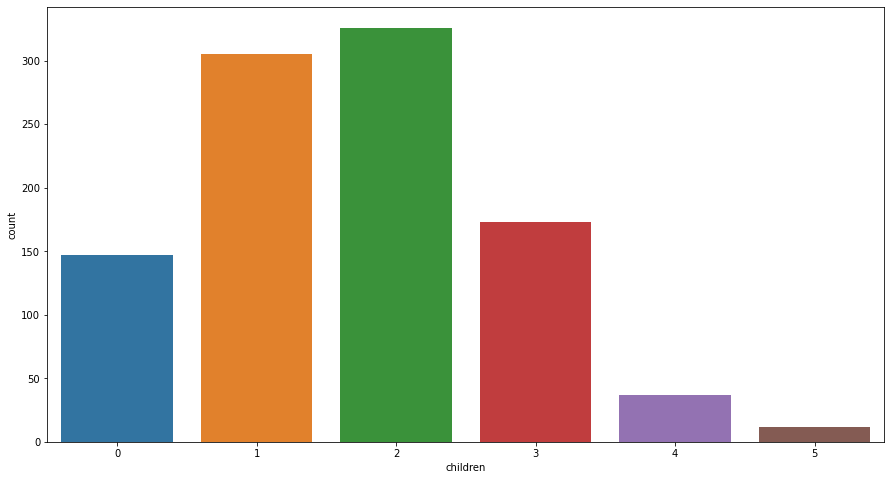

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(data=demographics,
             x='children')

<AxesSubplot:xlabel='city', ylabel='count'>

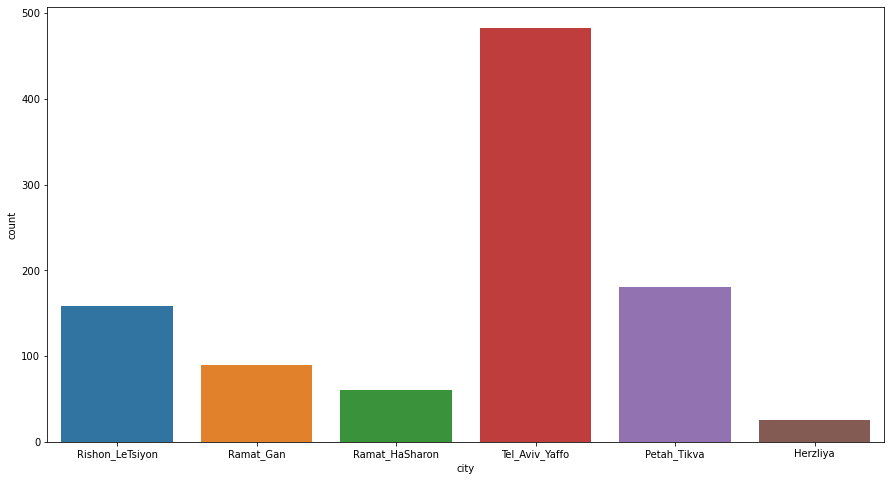

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(data=demographics,
             x='city')

Some correlations between features (children with electricity, age with electricity, etc)

In [67]:
os.listdir()

['.ipynb_checkpoints',
 'arnona.csv',
 'demographics.csv',
 'EDA.ipynb',
 'electricity.csv',
 'merged.csv',
 'Tables_Concatenation.ipynb',
 'water.csv']

In [68]:
merged = pd.read_csv('merged.csv')

In [77]:
merged.columns

Index(['name', 'birth_date', 'age', 'children', 'employment', 'id', 'city',
       'Elec_January', 'Elec_February', 'Elec_March', 'Elec_April', 'Elec_May',
       'Elec_June', 'Elec_July', 'Elec_August', 'Elec_September',
       'Elec_October', 'Elec_Novemeber', 'Elec_December', 'Water_January',
       'Water_February', 'Water_March', 'Water_April', 'Water_May',
       'Water_June', 'Water_July', 'Water_August', 'Water_September',
       'Water_October', 'Water_Novemeber', 'Water_December', 'Arnona',
       'avg_elec'],
      dtype='object')

In [78]:
elect_cols = ['Elec_January', 'Elec_February', 'Elec_March', 'Elec_April', 'Elec_May',
               'Elec_June', 'Elec_July', 'Elec_August', 'Elec_September',
               'Elec_October', 'Elec_Novemeber', 'Elec_December']

water_cols = ['Water_January', 'Water_February', 'Water_March', 'Water_April', 
              'Water_May','Water_June', 'Water_July', 'Water_August', 
              'Water_September', 'Water_October', 'Water_Novemeber', 'Water_December']

In [79]:
merged['avg_elec'] = merged[elect_cols].sum(axis=1)/12
merged['avg_water'] = merged[water_cols].sum(axis=1)/12

In [83]:
corr_feats = ['Arnona', 'avg_elec', 'avg_water', 'age', 'children', 'employment']

In [84]:
corr = merged[corr_feats].corr()

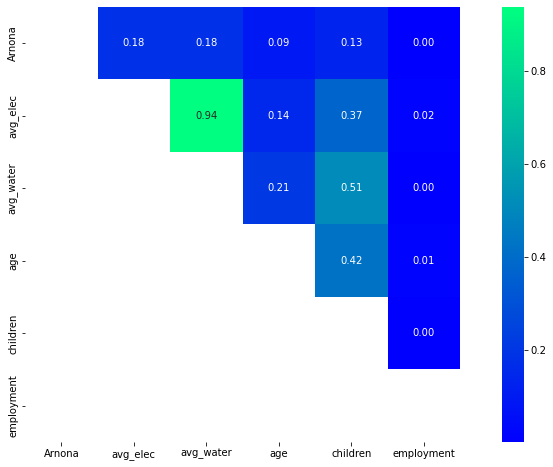

In [91]:
plt.figure(figsize=(15,8))
mask = np.tril(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, 
                 annot=True, 
                 fmt=".2f", 
                 mask = mask, 
                 square = True,
                 cmap='winter'
                 )

In [80]:
merged.head()

,name,birth_date,age,children,employment,id,city,Elec_January,Elec_February,Elec_March,Elec_April,Elec_May,Elec_June,Elec_July,Elec_August,Elec_September,Elec_October,Elec_Novemeber,Elec_December,Water_January,Water_February,Water_March,Water_April,Water_May,Water_June,Water_July,Water_August,Water_September,Water_October,Water_Novemeber,Water_December,Arnona,avg_elec,avg_water
0,Carolyn Maxwell,1977-05-08,45,3,1,275577,Rishon_LeTsiyon,159.836085,142.613838,86.135874,118.377261,121.039251,122.093610,139.041100,99.942512,122.961977,109.987276,115.741133,142.132228,29.949542,29.407899,68.598871,38.122866,82.455467,56.160632,77.139078,57.063990,51.644350,78.358674,62.868517,71.419495,925.818053,123.325179,58.599115
1,Karen Lewis,1964-07-03,58,2,1,381455,Ramat_Gan,283.184533,259.160898,200.194615,239.098017,241.357899,241.551142,251.312567,224.660234,247.252417,227.850016,238.123470,256.123497,77.289945,59.500058,64.792058,80.935199,51.217866,126.742549,80.780546,74.295264,100.749690,110.326977,81.672367,74.987519,646.788421,242.489109,81.940837
2,Michael Ochoa,1992-07-30,30,1,1,376324,Ramat_HaSharon,148.455611,138.406645,87.938437,115.246668,115.794555,116.441583,130.077618,98.668334,117.300889,111.370193,114.368791,131.125701,32.511556,79.367638,71.763645,93.219920,68.044189,58.015769,78.663846,37.476421,89.030289,62.875537,47.501909,76.159771,521.599738,118.766252,66.219207
3,Anthony Orr,1977-10-03,45,2,1,454422,Tel_Aviv_Yaffo,281.527149,270.264577,199.684379,213.167251,236.985223,239.281382,246.275428,202.720614,241.991039,206.815925,213.081757,246.645002,117.574795,59.813435,111.758970,63.503815,76.355345,48.353775,55.183664,66.925268,70.203328,76.483371,126.003453,63.333853,1066.838787,233.203311,77.957756
4,Angela Humphrey,1961-02-25,61,1,1,354169,Ramat_Gan,235.113497,232.025577,171.087153,187.543315,191.876388,194.774049,207.267990,174.309363,200.109117,176.598516,186.787326,220.224922,55.434655,55.749835,50.567353,112.167661,53.542866,67.878515,75.196150,104.748537,70.382449,65.091528,69.469268,32.210210,682.137018,198.143101,67.703252


In [92]:
merged_enc = pd.get_dummies(merged, columns=['children', 'city'])

In [94]:
merged_enc = merged_enc.drop(columns=['name', 'id', 'birth_date','avg_elec', 'avg_water'])

In [103]:
merged_enc.head(5)

,age,employment,Elec_January,Elec_February,Elec_March,Elec_April,Elec_May,Elec_June,Elec_July,Elec_August,Elec_September,Elec_October,Elec_Novemeber,Elec_December,Water_January,Water_February,Water_March,Water_April,Water_May,Water_June,Water_July,Water_August,Water_September,Water_October,Water_Novemeber,Water_December,Arnona,children_0,children_1,children_2,children_3,children_4,children_5,city_Herzliya,city_Petah_Tikva,city_Ramat_Gan,city_Ramat_HaSharon,city_Rishon_LeTsiyon,city_Tel_Aviv_Yaffo
0,45,1,159.836085,142.613838,86.135874,118.377261,121.039251,122.093610,139.041100,99.942512,122.961977,109.987276,115.741133,142.132228,29.949542,29.407899,68.598871,38.122866,82.455467,56.160632,77.139078,57.063990,51.644350,78.358674,62.868517,71.419495,925.818053,0,0,0,1,0,0,0,0,0,0,1,0
1,58,1,283.184533,259.160898,200.194615,239.098017,241.357899,241.551142,251.312567,224.660234,247.252417,227.850016,238.123470,256.123497,77.289945,59.500058,64.792058,80.935199,51.217866,126.742549,80.780546,74.295264,100.749690,110.326977,81.672367,74.987519,646.788421,0,0,1,0,0,0,0,0,1,0,0,0
2,30,1,148.455611,138.406645,87.938437,115.246668,115.794555,116.441583,130.077618,98.668334,117.300889,111.370193,114.368791,131.125701,32.511556,79.367638,71.763645,93.219920,68.044189,58.015769,78.663846,37.476421,89.030289,62.875537,47.501909,76.159771,521.599738,0,1,0,0,0,0,0,0,0,1,0,0
3,45,1,281.527149,270.264577,199.684379,213.167251,236.985223,239.281382,246.275428,202.720614,241.991039,206.815925,213.081757,246.645002,117.574795,59.813435,111.758970,63.503815,76.355345,48.353775,55.183664,66.925268,70.203328,76.483371,126.003453,63.333853,1066.838787,0,0,1,0,0,0,0,0,0,0,0,1
4,61,1,235.113497,232.025577,171.087153,187.543315,191.876388,194.774049,207.267990,174.309363,200.109117,176.598516,186.787326,220.224922,55.434655,55.749835,50.567353,112.167661,53.542866,67.878515,75.196150,104.748537,70.382449,65.091528,69.469268,32.210210,682.137018,0,1,0,0,0,0,0,0,1,0,0,0


In [96]:
merged_enc.columns.values

array(['age', 'employment', 'Elec_January', 'Elec_February', 'Elec_March',
       'Elec_April', 'Elec_May', 'Elec_June', 'Elec_July', 'Elec_August',
       'Elec_September', 'Elec_October', 'Elec_Novemeber',
       'Elec_December', 'Water_January', 'Water_February', 'Water_March',
       'Water_April', 'Water_May', 'Water_June', 'Water_July',
       'Water_August', 'Water_September', 'Water_October',
       'Water_Novemeber', 'Water_December', 'Arnona', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4',
       'children_5', 'city_Herzliya', 'city_Petah_Tikva',
       'city_Ramat_Gan', 'city_Ramat_HaSharon', 'city_Rishon_LeTsiyon',
       'city_Tel_Aviv_Yaffo'], dtype=object)

In [97]:
from sklearn.cluster import KMeans

## Kmeans without PCA, using every feature

In [98]:
clustering = KMeans(n_clusters=6, init='k-means++', random_state=42)
clustering.fit(merged_enc)

C:\Users\cohen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [101]:
labels = clustering.labels_
results = pd.concat([merged_enc.reset_index(), #original dtaframe
                     pd.Series(labels, name='cluster'), # series with cluster labels
                    merged['children']], axis=1) # adding back number of children

In [106]:
results = results.drop(columns=['index'])
results.head()

,age,employment,Elec_January,Elec_February,Elec_March,Elec_April,Elec_May,Elec_June,Elec_July,Elec_August,Elec_September,Elec_October,Elec_Novemeber,Elec_December,Water_January,Water_February,Water_March,Water_April,Water_May,Water_June,Water_July,Water_August,Water_September,Water_October,Water_Novemeber,Water_December,Arnona,children_0,children_1,children_2,children_3,children_4,children_5,city_Herzliya,city_Petah_Tikva,city_Ramat_Gan,city_Ramat_HaSharon,city_Rishon_LeTsiyon,city_Tel_Aviv_Yaffo,cluster,children
0,45,1,159.836085,142.613838,86.135874,118.377261,121.039251,122.093610,139.041100,99.942512,122.961977,109.987276,115.741133,142.132228,29.949542,29.407899,68.598871,38.122866,82.455467,56.160632,77.139078,57.063990,51.644350,78.358674,62.868517,71.419495,925.818053,0,0,0,1,0,0,0,0,0,0,1,0,5,3
1,58,1,283.184533,259.160898,200.194615,239.098017,241.357899,241.551142,251.312567,224.660234,247.252417,227.850016,238.123470,256.123497,77.289945,59.500058,64.792058,80.935199,51.217866,126.742549,80.780546,74.295264,100.749690,110.326977,81.672367,74.987519,646.788421,0,0,1,0,0,0,0,0,1,0,0,0,0,2
2,30,1,148.455611,138.406645,87.938437,115.246668,115.794555,116.441583,130.077618,98.668334,117.300889,111.370193,114.368791,131.125701,32.511556,79.367638,71.763645,93.219920,68.044189,58.015769,78.663846,37.476421,89.030289,62.875537,47.501909,76.159771,521.599738,0,1,0,0,0,0,0,0,0,1,0,0,5,1
3,45,1,281.527149,270.264577,199.684379,213.167251,236.985223,239.281382,246.275428,202.720614,241.991039,206.815925,213.081757,246.645002,117.574795,59.813435,111.758970,63.503815,76.355345,48.353775,55.183664,66.925268,70.203328,76.483371,126.003453,63.333853,1066.838787,0,0,1,0,0,0,0,0,0,0,0,1,0,2
4,61,1,235.113497,232.025577,171.087153,187.543315,191.876388,194.774049,207.267990,174.309363,200.109117,176.598516,186.787326,220.224922,55.434655,55.749835,50.567353,112.167661,53.542866,67.878515,75.196150,104.748537,70.382449,65.091528,69.469268,32.210210,682.137018,0,1,0,0,0,0,0,0,1,0,0,0,5,1


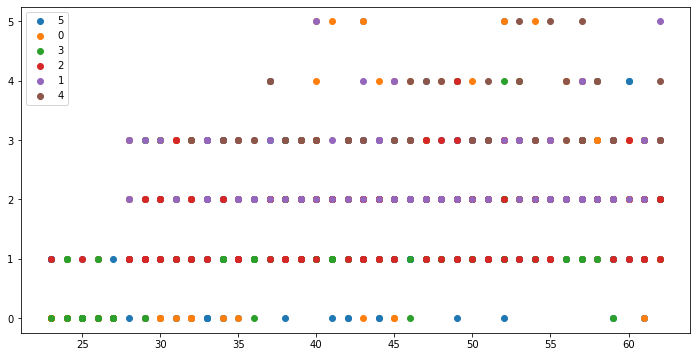

In [107]:
plt.figure(figsize=(12,6))
for c in results['cluster'].unique():
    plt.scatter(x=results[results['cluster']==c]['age'],
                y=results[results['cluster']==c]['children'],
                label=c)
plt.legend()
# plt.title(f’scatter plot of clusters for component {comp_1} and {comp_2}’)
plt.show()

## PCA

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [109]:
merged.head()

,name,birth_date,age,children,employment,id,city,Elec_January,Elec_February,Elec_March,Elec_April,Elec_May,Elec_June,Elec_July,Elec_August,Elec_September,Elec_October,Elec_Novemeber,Elec_December,Water_January,Water_February,Water_March,Water_April,Water_May,Water_June,Water_July,Water_August,Water_September,Water_October,Water_Novemeber,Water_December,Arnona,avg_elec,avg_water
0,Carolyn Maxwell,1977-05-08,45,3,1,275577,Rishon_LeTsiyon,159.836085,142.613838,86.135874,118.377261,121.039251,122.093610,139.041100,99.942512,122.961977,109.987276,115.741133,142.132228,29.949542,29.407899,68.598871,38.122866,82.455467,56.160632,77.139078,57.063990,51.644350,78.358674,62.868517,71.419495,925.818053,123.325179,58.599115
1,Karen Lewis,1964-07-03,58,2,1,381455,Ramat_Gan,283.184533,259.160898,200.194615,239.098017,241.357899,241.551142,251.312567,224.660234,247.252417,227.850016,238.123470,256.123497,77.289945,59.500058,64.792058,80.935199,51.217866,126.742549,80.780546,74.295264,100.749690,110.326977,81.672367,74.987519,646.788421,242.489109,81.940837
2,Michael Ochoa,1992-07-30,30,1,1,376324,Ramat_HaSharon,148.455611,138.406645,87.938437,115.246668,115.794555,116.441583,130.077618,98.668334,117.300889,111.370193,114.368791,131.125701,32.511556,79.367638,71.763645,93.219920,68.044189,58.015769,78.663846,37.476421,89.030289,62.875537,47.501909,76.159771,521.599738,118.766252,66.219207
3,Anthony Orr,1977-10-03,45,2,1,454422,Tel_Aviv_Yaffo,281.527149,270.264577,199.684379,213.167251,236.985223,239.281382,246.275428,202.720614,241.991039,206.815925,213.081757,246.645002,117.574795,59.813435,111.758970,63.503815,76.355345,48.353775,55.183664,66.925268,70.203328,76.483371,126.003453,63.333853,1066.838787,233.203311,77.957756
4,Angela Humphrey,1961-02-25,61,1,1,354169,Ramat_Gan,235.113497,232.025577,171.087153,187.543315,191.876388,194.774049,207.267990,174.309363,200.109117,176.598516,186.787326,220.224922,55.434655,55.749835,50.567353,112.167661,53.542866,67.878515,75.196150,104.748537,70.382449,65.091528,69.469268,32.210210,682.137018,198.143101,67.703252


In [110]:
merged_pca = merged.drop(columns=['name', 'id', 'birth_date','avg_elec', 'avg_water'])

In [111]:
merged_pca = pd.get_dummies(merged_pca, columns=['children', 'city'])

In [112]:
merged_pca.head()

,age,employment,Elec_January,Elec_February,Elec_March,Elec_April,Elec_May,Elec_June,Elec_July,Elec_August,Elec_September,Elec_October,Elec_Novemeber,Elec_December,Water_January,Water_February,Water_March,Water_April,Water_May,Water_June,Water_July,Water_August,Water_September,Water_October,Water_Novemeber,Water_December,Arnona,children_0,children_1,children_2,children_3,children_4,children_5,city_Herzliya,city_Petah_Tikva,city_Ramat_Gan,city_Ramat_HaSharon,city_Rishon_LeTsiyon,city_Tel_Aviv_Yaffo
0,45,1,159.836085,142.613838,86.135874,118.377261,121.039251,122.093610,139.041100,99.942512,122.961977,109.987276,115.741133,142.132228,29.949542,29.407899,68.598871,38.122866,82.455467,56.160632,77.139078,57.063990,51.644350,78.358674,62.868517,71.419495,925.818053,0,0,0,1,0,0,0,0,0,0,1,0
1,58,1,283.184533,259.160898,200.194615,239.098017,241.357899,241.551142,251.312567,224.660234,247.252417,227.850016,238.123470,256.123497,77.289945,59.500058,64.792058,80.935199,51.217866,126.742549,80.780546,74.295264,100.749690,110.326977,81.672367,74.987519,646.788421,0,0,1,0,0,0,0,0,1,0,0,0
2,30,1,148.455611,138.406645,87.938437,115.246668,115.794555,116.441583,130.077618,98.668334,117.300889,111.370193,114.368791,131.125701,32.511556,79.367638,71.763645,93.219920,68.044189,58.015769,78.663846,37.476421,89.030289,62.875537,47.501909,76.159771,521.599738,0,1,0,0,0,0,0,0,0,1,0,0
3,45,1,281.527149,270.264577,199.684379,213.167251,236.985223,239.281382,246.275428,202.720614,241.991039,206.815925,213.081757,246.645002,117.574795,59.813435,111.758970,63.503815,76.355345,48.353775,55.183664,66.925268,70.203328,76.483371,126.003453,63.333853,1066.838787,0,0,1,0,0,0,0,0,0,0,0,1
4,61,1,235.113497,232.025577,171.087153,187.543315,191.876388,194.774049,207.267990,174.309363,200.109117,176.598516,186.787326,220.224922,55.434655,55.749835,50.567353,112.167661,53.542866,67.878515,75.196150,104.748537,70.382449,65.091528,69.469268,32.210210,682.137018,0,1,0,0,0,0,0,0,1,0,0,0


In [113]:
merged_pca.columns

Index(['age', 'employment', 'Elec_January', 'Elec_February', 'Elec_March',
       'Elec_April', 'Elec_May', 'Elec_June', 'Elec_July', 'Elec_August',
       'Elec_September', 'Elec_October', 'Elec_Novemeber', 'Elec_December',
       'Water_January', 'Water_February', 'Water_March', 'Water_April',
       'Water_May', 'Water_June', 'Water_July', 'Water_August',
       'Water_September', 'Water_October', 'Water_Novemeber', 'Water_December',
       'Arnona', 'children_0', 'children_1', 'children_2', 'children_3',
       'children_4', 'children_5', 'city_Herzliya', 'city_Petah_Tikva',
       'city_Ramat_Gan', 'city_Ramat_HaSharon', 'city_Rishon_LeTsiyon',
       'city_Tel_Aviv_Yaffo'],
      dtype='object')

In [114]:
num_feats = ['age','Elec_January', 'Elec_February', 'Elec_March',
       'Elec_April', 'Elec_May', 'Elec_June', 'Elec_July', 'Elec_August',
       'Elec_September', 'Elec_October', 'Elec_Novemeber', 'Elec_December',
       'Water_January', 'Water_February', 'Water_March', 'Water_April',
       'Water_May', 'Water_June', 'Water_July', 'Water_August',
       'Water_September', 'Water_October', 'Water_Novemeber', 'Water_December',
       'Arnona'] #dropped one-hot enconded features + employment (binary)

In [115]:
merged_pca = StandardScaler().fit_transform(merged_pca[num_feats])

In [116]:
merged_pca.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'